In [59]:
##EDA

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("train.csv")

In [62]:
df.shape

(614, 13)

In [63]:
df = df.dropna(axis=0,how='any')
df.shape

(480, 13)

In [64]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [65]:
df = df.drop('Loan_ID',axis=1)

In [66]:
df = pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status','Dependents'],drop_first=True)

In [67]:
df.corr()['Loan_Status_Y'].sort_values()

LoanAmount                -0.071753
Education_Not Graduate    -0.068437
Property_Area_Urban       -0.055964
CoapplicantIncome         -0.049020
ApplicantIncome           -0.043152
Dependents_1              -0.040350
Self_Employed_Yes         -0.034715
Loan_Amount_Term          -0.007798
Dependents_3+             -0.005784
Gender_Male                0.064504
Dependents_2               0.073368
Married_Yes                0.112321
Property_Area_Semiurban    0.155686
Credit_History_1.0         0.529390
Loan_Status_Y              1.000000
Name: Loan_Status_Y, dtype: float64

In [68]:
## Split

In [69]:
X = df.drop('Loan_Status_Y',axis=1).values
y = df['Loan_Status_Y'].values

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=101)

In [72]:
## Scaler

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()

In [75]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
X_train.shape,X_test.shape

((408, 14), (72, 14))

In [77]:
## Model building

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [79]:
model = Sequential()

model.add(Dense(14,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(14,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(14,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [80]:
# Training

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [82]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=300,batch_size=32,verbose=1,callbacks=[early_stop])

Train on 408 samples, validate on 72 samples
Epoch 1/300
408/408 [==============================] - 1s 1ms/sample - loss: 0.6833 - val_loss: 0.6398
Epoch 2/300
408/408 [==============================] - 0s 51us/sample - loss: 0.6832 - val_loss: 0.6404
Epoch 3/300
408/408 [==============================] - 0s 49us/sample - loss: 0.6907 - val_loss: 0.6409
Epoch 4/300
408/408 [==============================] - 0s 71us/sample - loss: 0.6662 - val_loss: 0.6394
Epoch 5/300
408/408 [==============================] - 0s 68us/sample - loss: 0.6735 - val_loss: 0.6379
Epoch 6/300
408/408 [==============================] - 0s 59us/sample - loss: 0.6367 - val_loss: 0.6362
Epoch 7/300
408/408 [==============================] - 0s 56us/sample - loss: 0.6296 - val_loss: 0.6317
Epoch 8/300
408/408 [==============================] - 0s 56us/sample - loss: 0.6613 - val_loss: 0.6282
Epoch 9/300
408/408 [==============================] - 0s 54us/sample - loss: 0.6550 - val_loss: 0.6287
Epoch 10/300
408/408

408/408 [==============================] - 0s 46us/sample - loss: 0.5162 - val_loss: 0.5449
Epoch 79/300
408/408 [==============================] - 0s 64us/sample - loss: 0.5381 - val_loss: 0.5438
Epoch 80/300
408/408 [==============================] - 0s 49us/sample - loss: 0.5520 - val_loss: 0.5419
Epoch 81/300
408/408 [==============================] - 0s 46us/sample - loss: 0.5304 - val_loss: 0.5420
Epoch 82/300
408/408 [==============================] - 0s 54us/sample - loss: 0.5427 - val_loss: 0.5430
Epoch 83/300
408/408 [==============================] - 0s 46us/sample - loss: 0.5385 - val_loss: 0.5417
Epoch 84/300
408/408 [==============================] - 0s 49us/sample - loss: 0.5511 - val_loss: 0.5407
Epoch 85/300
408/408 [==============================] - 0s 51us/sample - loss: 0.5187 - val_loss: 0.5391
Epoch 86/300
408/408 [==============================] - 0s 51us/sample - loss: 0.5350 - val_loss: 0.5381
Epoch 87/300
408/408 [==============================] - 0s 51us/samp

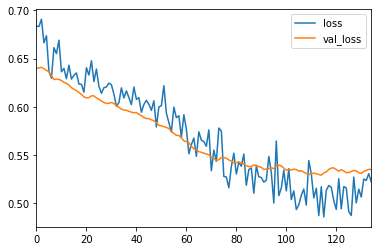

In [83]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [84]:
## Evaluation

In [85]:
predictions = model.predict_classes(X_test)

predictions.shape,y_test.shape

((72, 1), (72,))

In [86]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 6 15]
 [ 1 50]]


In [87]:
from sklearn import metrics
print('The accuracy is: ', metrics.accuracy_score(predictions, y_test))

The accuracy is:  0.7777777777777778
